# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | recreo
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | berezovyy
Processing Record 15 of Set 1 | fonte boa
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | curup
Processing Record 22 of Set 1 | chibougamau
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,302.18,65,98,4.12,CK,1706672978
1,longyearbyen,78.2186,15.6401,268.06,63,75,5.66,SJ,1706672979
2,tiksi,71.6872,128.8694,246.52,97,65,1.67,RU,1706672979
3,recreo,-29.2818,-65.0610,302.18,30,5,7.26,AR,1706672979
4,ribeira grande,38.5167,-28.7000,286.91,87,29,3.13,PT,1706672979


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,302.18,65,98,4.12,CK,1706672978
1,longyearbyen,78.2186,15.6401,268.06,63,75,5.66,SJ,1706672979
2,tiksi,71.6872,128.8694,246.52,97,65,1.67,RU,1706672979
3,recreo,-29.2818,-65.0610,302.18,30,5,7.26,AR,1706672979
4,ribeira grande,38.5167,-28.7000,286.91,87,29,3.13,PT,1706672979


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

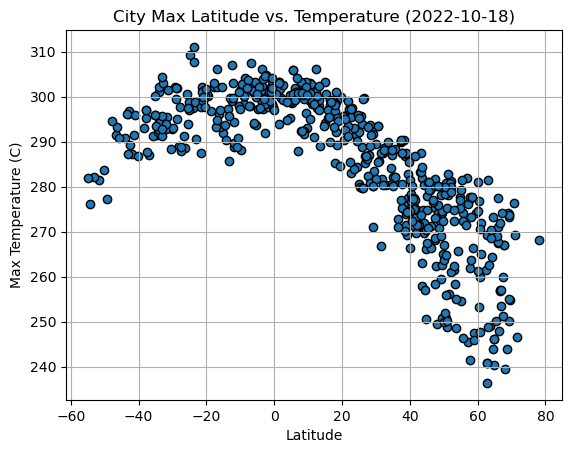

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

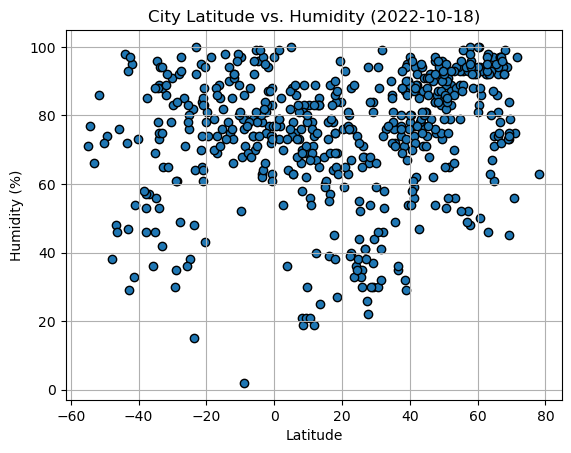

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

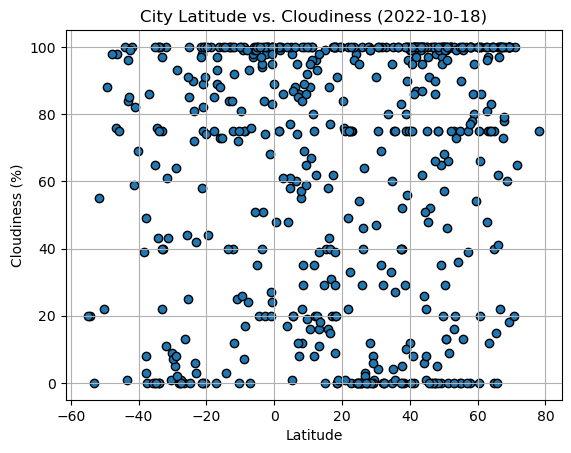

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

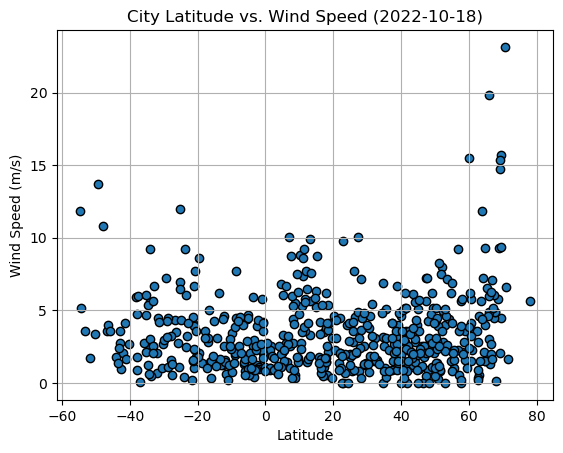

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,longyearbyen,78.2186,15.6401,268.06,63,75,5.66,SJ,1706672979
2,tiksi,71.6872,128.8694,246.52,97,65,1.67,RU,1706672979
4,ribeira grande,38.5167,-28.7000,286.91,87,29,3.13,PT,1706672979
9,talnakh,69.4865,88.3972,254.93,79,100,4.49,RU,1706672981
10,vorgashor,67.5833,63.9500,259.89,95,100,4.50,RU,1706672981


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,302.18,65,98,4.12,CK,1706672978
3,recreo,-29.2818,-65.0610,302.18,30,5,7.26,AR,1706672979
5,grytviken,-54.2811,-36.5092,276.16,77,20,5.15,GS,1706672741
6,cidreira,-30.1811,-50.2056,292.79,91,9,2.70,BR,1706672980
7,waitangi,-43.9535,-176.5597,290.83,98,100,1.79,NZ,1706672980


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8484574238222011


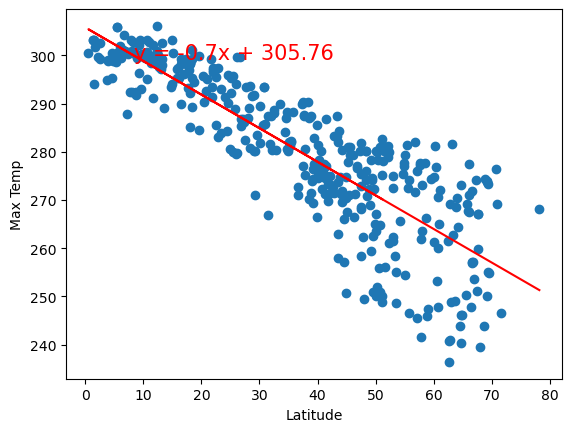

In [66]:
# Linear regression on Northern Hemisphere

# Define a function to create Linear Regression plots
def perform_linear_regression(x_values, y_values, x_label, y_label):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line and line equation
    regression_line = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Find suitable coordinates for annotation
    x_annotation = x_values.min() + (x_values.max() - x_values.min()) * 0.1
    y_annotation = y_values.max() - (y_values.max() - y_values.min()) * 0.1

    # Create scatter plot
    plt.scatter(x_values, y_values,  marker='o')
    plt.annotate(line_eq,(x_annotation, y_annotation), fontsize=15, color="red")

    # Plot the regression line
    plt.plot(x_values, regression_line, color = "red")

    # Create x and y label
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show plot and print the r_value
    print(f"The r-value is: {r_value}")
    plt.show()

# Perform linear regression on Northern Hemisphere
perform_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")


The r-value is: 0.5526005681350242


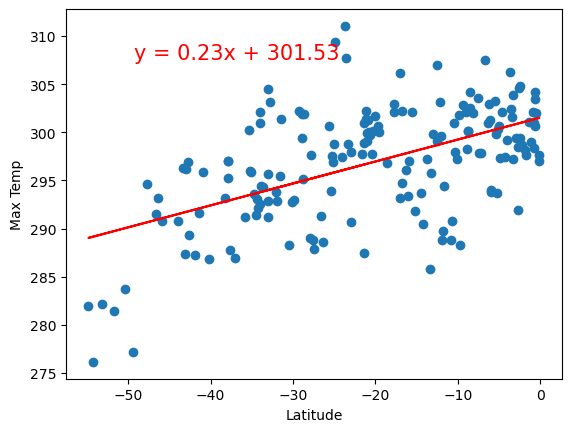

In [56]:
# Linear regression on Southern Hemisphere

# Define a function to create Linear Regression plots
def perform_linear_regression(x_values, y_values, x_label, y_label):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line and line equation
    regression_line = slope * x_values + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o')
    
    # Find suitable coordinates for annotation
    x_annotation = x_values.min() + (x_values.max() - x_values.min()) * 0.1
    y_annotation = y_values.max() - (y_values.max() - y_values.min()) * 0.1

    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")

    # Annotate the line equation
    plt.annotate(line_eq,(x_annotation, y_annotation), fontsize=15, color="red")

    # Create x and y label
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show plot and print the r_value
    print(f"The r-value is: {r_value}")
    plt.show()

# Perform linear regression on Southern Hemisphere
perform_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

Discussion about the linear relationship:
* Above graphs shows the relationship between temperature and latitude in the Nothern and Southern Hemisphere.
* Negative correlation in linear regression on Northern Hemisphere indicates that temperature tends to decrease with increasing latitude.
* Positive correlation in linear regression on Southern Hemisphere indicates that temperature tends to increase with increasing latitude.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3575095552937612


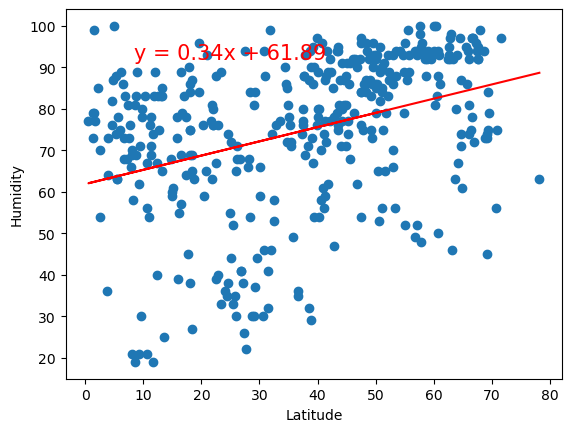

In [57]:
# Northern Hemisphere

# Define a function to create Linear Regression plots
def perform_linear_regression(x_values, y_values, x_label, y_label):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line and line equation
    regression_line = slope * x_values + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o')
    
    # Find suitable coordinates for annotation in Northern Hemisphere
    x_annotation = x_values.min() + (x_values.max() - x_values.min()) * 0.1
    y_annotation = y_values.min() + (y_values.max() - y_values.min()) * 0.9

    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")

    # Annotate the line equation
    plt.annotate(line_eq, (x_annotation, y_annotation), fontsize=15, color="red")

    # Create x and y label
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show plot and print the r_value
    print(f"The r-value is: {r_value}")
    plt.show()

# Perform linear regression on Northern Hemisphere 
perform_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r-value is: 0.24833751427466108


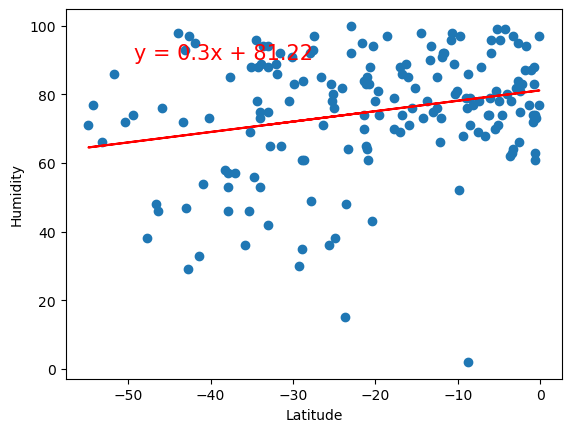

In [58]:
# Southern Hemisphere


# Define a function to create Linear Regression plots
def perform_linear_regression(x_values, y_values, x_label, y_label):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line and line equation
    regression_line = slope * x_values + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o')
    
    # Find suitable coordinates for annotation 
    x_annotation = x_values.min() + (x_values.max() - x_values.min()) * 0.1
    y_annotation = y_values.min() + (y_values.max() - y_values.min()) * 0.9

    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")

    # Annotate the line equation
    plt.annotate(line_eq, (x_annotation, y_annotation), fontsize=15, color="red")

    # Create x and y label
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show plot and print the r_value
    print(f"The r-value is: {r_value}")
    plt.show()

# Perform linear regression on Southern Hemisphere 
perform_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** 
* Positive slope indicates in both Nothern and Southern Hemispheres indicates, when it moves toward higher latitudes, humidity tends to increase.
* Negative slope indicates, when it moves toward higher latitudes, humidity tends to decrease.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14903377277167318


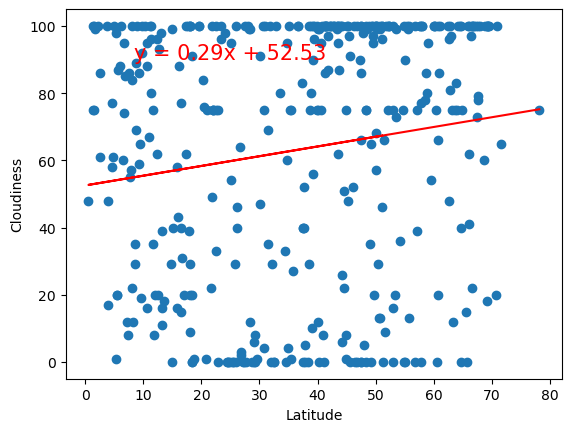

In [59]:
# Northern Hemisphere


# Define a function to create Linear Regression plots
def perform_linear_regression(x_values, y_values, x_label, y_label):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line and line equation
    regression_line = slope * x_values + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o')
    
    # Find suitable coordinates for annotation 
    x_annotation = x_values.min() + (x_values.max() - x_values.min()) * 0.1
    y_annotation = y_values.min() + (y_values.max() - y_values.min()) * 0.9

    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")

    # Annotate the line equation
    plt.annotate(line_eq, (x_annotation, y_annotation), fontsize=15, color="red")

    # Create x and y label
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show plot and print the r_value
    print(f"The r-value is: {r_value}")
    plt.show()

# Perform linear regression on Northern Hemisphere
perform_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r-value is: 0.27310569261035983


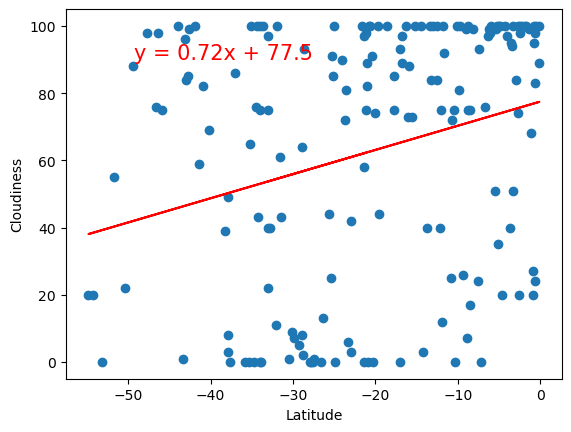

In [60]:
# Southern Hemisphere

# Define a function to create Linear Regression plots
def perform_linear_regression(x_values, y_values, x_label, y_label):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line and line equation
    regression_line = slope * x_values + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o')
    
    # Find suitable coordinates for annotation
    x_annotation = x_values.min() + (x_values.max() - x_values.min()) * 0.1
    y_annotation = y_values.min() + (y_values.max() - y_values.min()) * 0.9

    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")

    # Annotate the line equation
    plt.annotate(line_eq, (x_annotation, y_annotation), fontsize=15, color="red")

    # Create x and y label
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show plot and print the r_value
    print(f"The r-value is: {r_value}")
    plt.show()

# Perform linear regression on Southern Hemisphere
perform_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** 
* Above graphs shows the correlation between cloudiness and latitude in the Nothern and Southern   Hemisphere.
* Both of them indicates a positive slope which suggests that cloudiness tends to increase with increasing latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15833242401422154


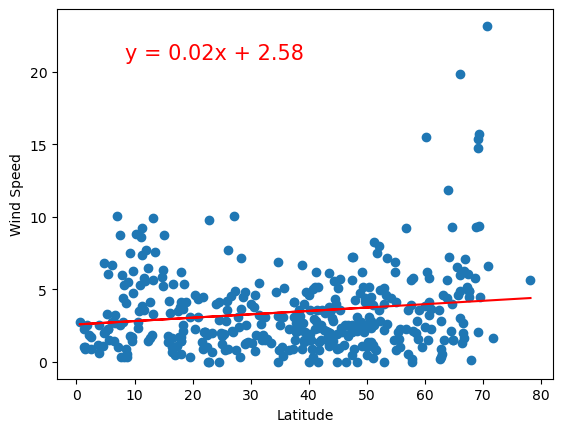

In [62]:
# Northern Hemisphere

# Define a function to create Linear Regression plots
def perform_linear_regression(x_values, y_values, x_label, y_label):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line and line equation
    regression_line = slope * x_values + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o')
    
    # Find suitable coordinates for annotation
    x_annotation = x_values.min() + (x_values.max() - x_values.min()) * 0.1
    y_annotation = y_values.min() + (y_values.max() - y_values.min()) * 0.9

    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")

    # Annotate the line equation
    plt.annotate(line_eq, (x_annotation, y_annotation), fontsize=15, color="red")

    # Create x and y label
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show plot and print the r_value
    print(f"The r-value is: {r_value}")
    plt.show()

# Perform linear regression on Northern Hemisphere
perform_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r-value is: -0.2772960360600993


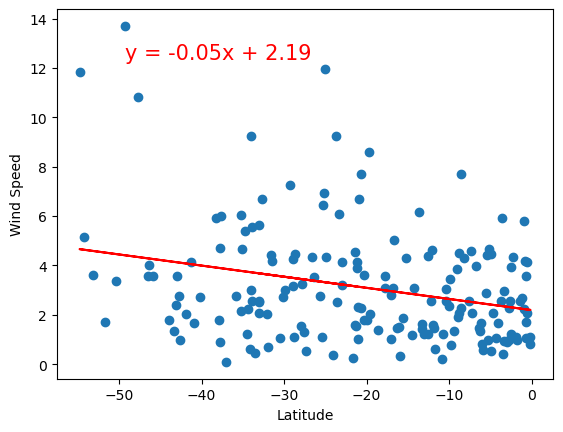

In [63]:
# Southern Hemisphere

# Define a function to create Linear Regression plots
def perform_linear_regression(x_values, y_values, x_label, y_label):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line and line equation
    regression_line = slope * x_values + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o')
    
    # Find suitable coordinates for annotation
    x_annotation = x_values.min() + (x_values.max() - x_values.min()) * 0.1
    y_annotation = y_values.min() + (y_values.max() - y_values.min()) * 0.9

    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")

    # Annotate the line equation
    plt.annotate(line_eq, (x_annotation, y_annotation), fontsize=15, color="red")

    # Create x and y label
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show plot and print the r_value
    print(f"The r-value is: {r_value}")
    plt.show()

# Perform linear regression on Southern Hemisphere
perform_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** 
* Northern Hemisphere linear regression plot indicates a slight positive increase (minor positive slope) which suggests that suggest when it moves toward higher latitudes, wind speed tends to increase.
* Southern Hemisphere linear regression plot indicates a negative slope which suggests when it moves towards  higher latitudes, wind speed tends to decrease.